In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

In [2]:
breast_cancer = load_breast_cancer()
dados = breast_cancer.data
alvo = breast_cancer.target

In [3]:
dados_treino, dados_teste, alvo_treino, alvo_teste = train_test_split(dados, alvo, test_size=0.3, random_state=42)

In [4]:
nb = MultinomialNB()
nb.fit(dados_treino, alvo_treino)
alvo_pred_nb = nb.predict(dados_teste)

lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(dados_treino, alvo_treino)
alvo_pred_lr = lr.predict(dados_teste)

In [5]:
conf_nb = confusion_matrix(alvo_teste, alvo_pred_nb)
conf_lr = confusion_matrix(alvo_teste, alvo_pred_lr)
print("Matriz de confusão Naive Bayes:\n", conf_nb)
print("Matriz de confusão Regressão Logística:\n", conf_lr)

Matriz de confusão Naive Bayes:
 [[ 50  13]
 [  2 106]]
Matriz de confusão Regressão Logística:
 [[ 61   2]
 [  2 106]]


In [6]:
# Acurácia
print("Acurácia Naive Bayes:", accuracy_score(alvo_teste, alvo_pred_nb))
print("Acurácia Regressão Logística:", accuracy_score(alvo_teste, alvo_pred_lr))

# Precisão
print("Precisão Naive Bayes:", precision_score(alvo_teste, alvo_pred_nb, average='weighted'))
print("Precisão Regressão Logística:", precision_score(alvo_teste, alvo_pred_lr, average='weighted'))

# Revocação
print("Revocação Naive Bayes:", recall_score(alvo_teste, alvo_pred_nb, average='weighted'))
print("Revocação Regressão Logística:", recall_score(alvo_teste, alvo_pred_lr, average='weighted'))

# Medida F1
print("Medida F1 Naive Bayes:", f1_score(alvo_teste, alvo_pred_nb, average='weighted'))
print("Medida F1 Regressão Logística:", f1_score(alvo_teste, alvo_pred_lr, average='weighted'))

Acurácia Naive Bayes: 0.9122807017543859
Acurácia Regressão Logística: 0.9766081871345029
Precisão Naive Bayes: 0.9168339400537542
Precisão Regressão Logística: 0.9766081871345029
Revocação Naive Bayes: 0.9122807017543859
Revocação Regressão Logística: 0.9766081871345029
Medida F1 Naive Bayes: 0.9102107884152059
Medida F1 Regressão Logística: 0.9766081871345029


In [7]:
# Avaliar desempenho usando classification report
print('Naive Bayes Classification Report:')
print(classification_report(alvo_teste, alvo_pred_nb))

print('Logistic Regression Classification Report:')
print(classification_report(alvo_teste, alvo_pred_lr))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87        63
           1       0.89      0.98      0.93       108

    accuracy                           0.91       171
   macro avg       0.93      0.89      0.90       171
weighted avg       0.92      0.91      0.91       171

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



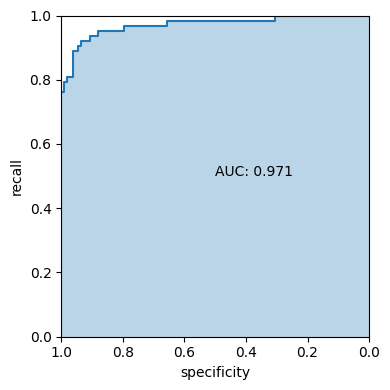

In [8]:
fpr, tpr, thresholds = roc_curve(alvo_teste, nb.predict_proba(dados_teste)[:, 0], pos_label=0)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.text(0.5, 0.5, f'AUC: {np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)):.3f}')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

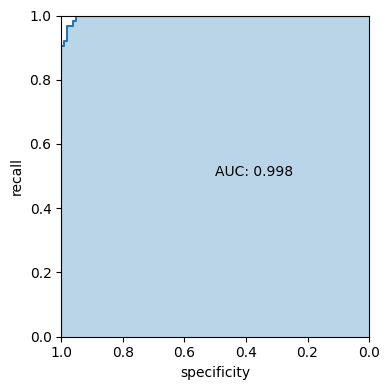

In [9]:
fpr, tpr, thresholds = roc_curve(alvo_teste, lr.predict_proba(dados_teste)[:, 0], pos_label=0)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.text(0.5, 0.5, f'AUC: {np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)):.3f}')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [10]:
alvo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,